<a href="https://colab.research.google.com/github/ShubhamNapNap/djs-gdg-tasks/blob/main/F1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use("ggplot")
pd.set_option("display.max_columns", 200)

In [ ]:
df = pd.read_csv("f1_dnf.csv")

In [ ]:
df.shape

(10000, 31)

In [ ]:
df.head()

,resultId,raceId,year,round,grid,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,driverRef,surname,forename,dob,nationality_x,constructorRef,name,nationality_y,circuitRef,circuitId,name_y,location,country,lat,lng,alt,date,target_finish
0,2460,136,2002,13,11,4,3.0,77.0,NaN,\N,\N,\N,\N,raikkonen,Räikkönen,Kimi,1979-10-17,Finnish,mclaren,Hungaroring,British,hungaroring,11,McLaren,Budapest,Hungary,47.5789,19.24860,264,2002-08-18,1
1,11565,483,1981,1,23,21,0.0,16.0,\N,\N,\N,\N,\N,watson,Watson,John,1946-05-04,British,mclaren,Long Beach,British,long_beach,43,McLaren,California,USA,33.7651,-118.18900,12,1981-03-15,0
2,18661,772,1958,8,0,26,0.0,0.0,\N,\N,\N,\N,\N,ruttman,Ruttman,Troy,1930-03-11,American,maserati,Nürburgring,Italian,nurburgring,20,Maserati,Nürburg,Germany,50.3356,6.94750,578,1958-08-03,0
3,25121,1058,2021,8,19,16,0.0,69.0,\N,57,16,1:10.005,222.052,mick_schumacher,Schumacher,Mick,1999-03-22,German,haas,Red Bull Ring,American,red_bull_ring,70,Haas F1 Team,Spielberg,Austria,47.2197,14.76470,678,2021-06-27,0
4,8863,383,1988,12,0,30,0.0,0.0,\N,\N,\N,\N,\N,modena,Modena,Stefano,1963-05-12,Italian,eurobrun,Autodromo Nazionale di Monza,Italian,monza,14,Euro Brun,Monza,Italy,45.6156,9.28111,162,1988-09-11,0


In [ ]:
df.columns

Index(['resultId', 'raceId', 'year', 'round', 'grid', 'positionOrder',
       'points', 'laps', 'milliseconds', 'fastestLap', 'rank',
       'fastestLapTime', 'fastestLapSpeed', 'driverRef', 'surname', 'forename',
       'dob', 'nationality_x', 'constructorRef', 'name', 'nationality_y',
       'circuitRef', 'circuitId', 'name_y', 'location', 'country', 'lat',
       'lng', 'alt', 'date', 'target_finish'],
      dtype='object')

In [ ]:
df.describe()

,resultId,raceId,year,round,grid,positionOrder,points,laps,circuitId,lat,lng,alt,target_finish
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9029.000000,9022.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,13440.56840,554.444500,1991.466600,8.540100,11.176200,12.681000,2.034460,46.759033,23.972500,34.013439,5.067721,281.465900,0.289500
std,7750.91677,314.184815,20.060237,5.085487,7.241008,7.635448,4.469553,29.840206,19.233599,25.167968,57.938131,414.586363,0.453553
min,9.00000,1.000000,1950.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-37.849700,-118.189000,-7.000000,0.000000
25%,6637.75000,300.000000,1977.000000,4.000000,5.000000,6.000000,0.000000,23.250000,9.000000,34.843100,-2.940560,18.000000,0.000000
50%,13428.50000,532.000000,1991.000000,8.000000,11.000000,12.000000,0.000000,53.000000,18.000000,43.734700,5.971390,153.000000,0.000000
75%,20159.25000,815.250000,2009.000000,12.000000,17.000000,18.000000,2.000000,67.000000,34.000000,49.254200,14.764700,401.000000,1.000000
max,26761.00000,1144.000000,2024.000000,24.000000,34.000000,39.000000,36.000000,200.000000,80.000000,57.265300,144.968000,2227.000000,1.000000


In [ ]:
df = df[[
    'resultId', 'year', 'round', 'grid', 'positionOrder', 'points', 'laps', 'dob', 'date', 'target_finish',
    'driverRef', 'forename', 'surname', 'nationality_x',
    'constructorRef', 'name', 'nationality_y',
    'circuitRef', 'name_y', 'location', 'country', 'lat', 'lng', 'alt'
]].copy()
df.head()

,resultId,year,round,grid,positionOrder,points,laps,dob,date,target_finish,driverRef,forename,surname,nationality_x,constructorRef,name,nationality_y,circuitRef,name_y,location,country,lat,lng,alt
0,2460,2002,13,11,4,3.0,77.0,1979-10-17,2002-08-18,1,raikkonen,Kimi,Räikkönen,Finnish,mclaren,Hungaroring,British,hungaroring,McLaren,Budapest,Hungary,47.5789,19.24860,264
1,11565,1981,1,23,21,0.0,16.0,1946-05-04,1981-03-15,0,watson,John,Watson,British,mclaren,Long Beach,British,long_beach,McLaren,California,USA,33.7651,-118.18900,12
2,18661,1958,8,0,26,0.0,0.0,1930-03-11,1958-08-03,0,ruttman,Troy,Ruttman,American,maserati,Nürburgring,Italian,nurburgring,Maserati,Nürburg,Germany,50.3356,6.94750,578
3,25121,2021,8,19,16,0.0,69.0,1999-03-22,2021-06-27,0,mick_schumacher,Mick,Schumacher,German,haas,Red Bull Ring,American,red_bull_ring,Haas F1 Team,Spielberg,Austria,47.2197,14.76470,678
4,8863,1988,12,0,30,0.0,0.0,1963-05-12,1988-09-11,0,modena,Stefano,Modena,Italian,eurobrun,Autodromo Nazionale di Monza,Italian,monza,Euro Brun,Monza,Italy,45.6156,9.28111,162


In [ ]:
df.shape

(10000, 24)

In [ ]:
df.dtypes

,0
resultId,int64
year,int64
round,int64
grid,int64
positionOrder,int64
points,float64
laps,float64
dob,object
date,object
target_finish,int64


In [ ]:
df['dob'] = pd.to_datetime(df['dob'])
df['date'] = pd.to_datetime(df['date'])
df['driver_age_at_race'] = (df['date'] - df['dob']).dt.days / 365.25
df['driver_name'] = df['forename'] + ' ' + df['surname']
df = df.drop(columns=['forename', 'surname'])

In [ ]:
df.isna().sum()

,0
resultId,0
year,0
round,0
grid,0
positionOrder,0
points,971
laps,978
dob,0
date,0
target_finish,0


In [ ]:
df.loc[df.duplicated()]

,resultId,year,round,grid,positionOrder,points,laps,dob,date,target_finish,driverRef,nationality_x,constructorRef,name,nationality_y,circuitRef,name_y,location,country,lat,lng,alt,driver_age_at_race,driver_name


In [ ]:
df = df.loc[~df.duplicated(subset=["year", "round", "driverRef", "constructorRef"])]\
.reset_index(drop=True).copy()

<Axes: xlabel='driver_age_at_race', ylabel='laps'>

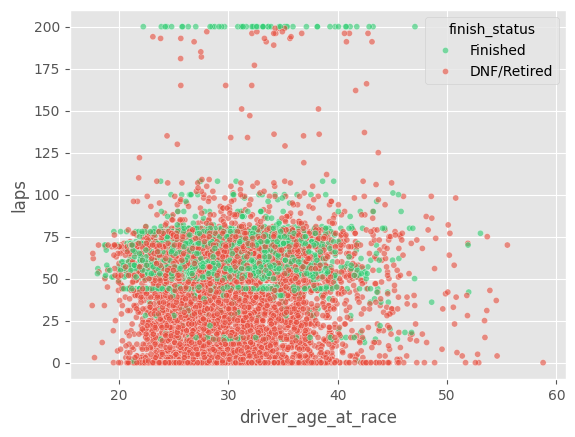

In [ ]:
df['finish_status'] = df['target_finish'].apply(lambda x: 'Finished' if x == 1 else 'DNF/Retired')
sns.scatterplot(x='driver_age_at_race',y='laps',hue='finish_status', data = df,
    palette={'Finished': '#2ecc71', 'DNF/Retired': '#e74c3c'},
    alpha=0.6,
    s=20
)

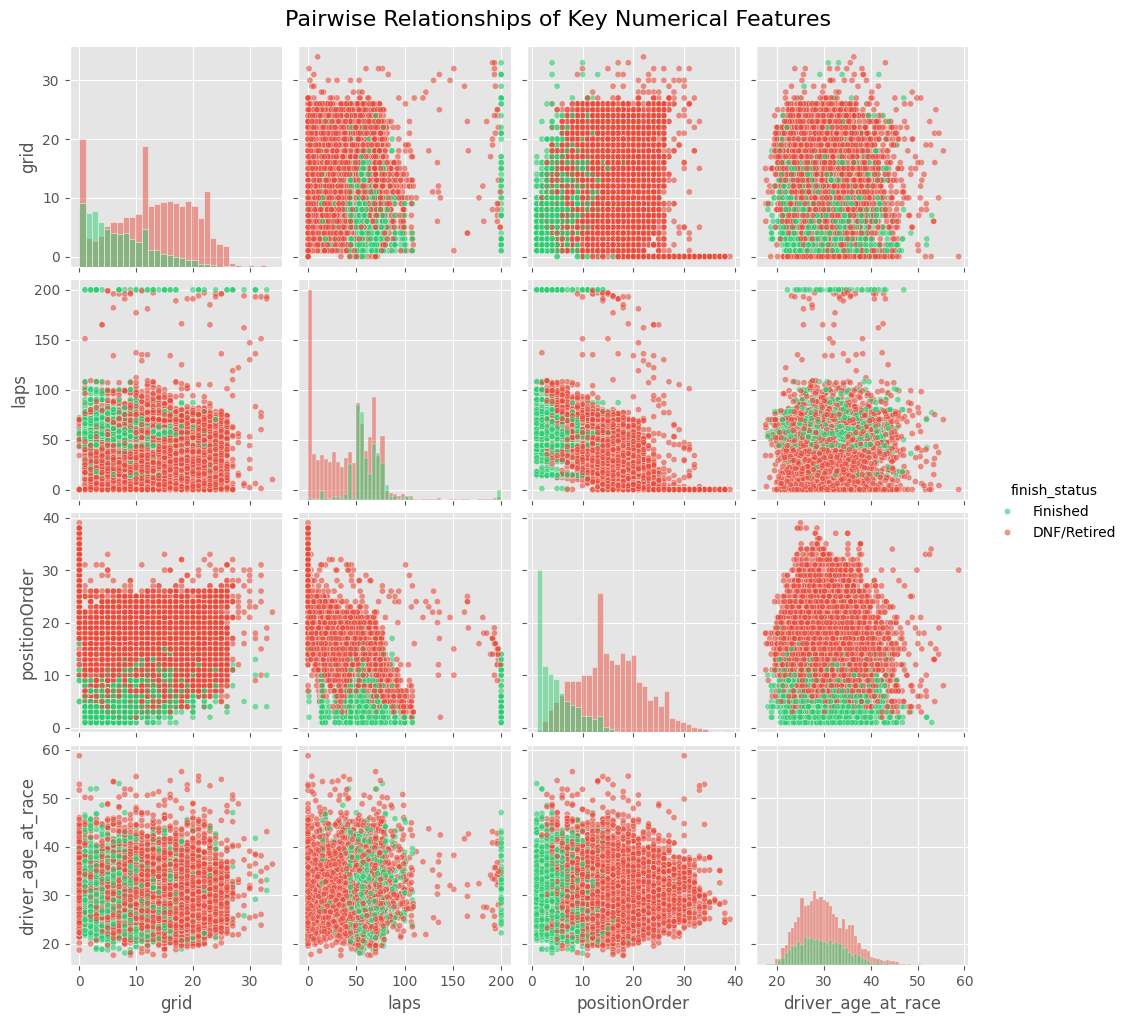

In [ ]:

numerical_features = [
    'grid',
    'laps',
    'positionOrder',
    'driver_age_at_race'
]

pair_plot = sns.pairplot(
    df,
    vars=numerical_features,
    hue='finish_status',
    palette={'Finished': '#2ecc71', 'DNF/Retired': '#e74c3c'},
    diag_kind='hist',
    plot_kws={'alpha': 0.6, 's': 20}
)
pair_plot.fig.suptitle('Pairwise Relationships of Key Numerical Features', y=1.02, fontsize=16)
plt.show()

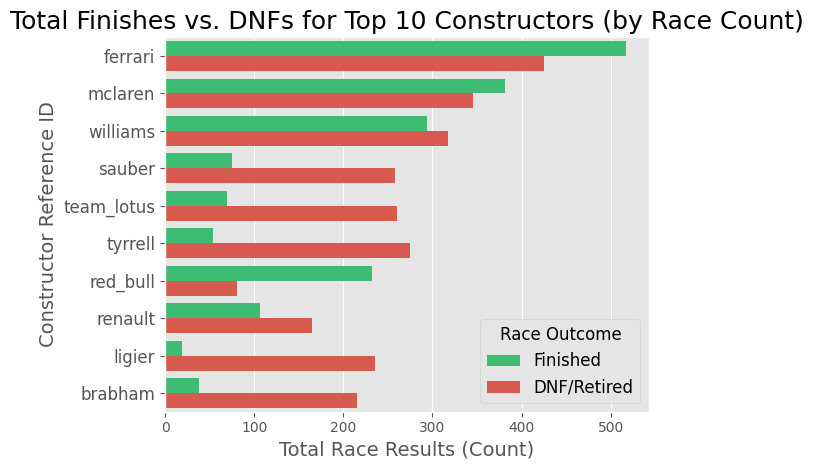

In [ ]:
df['finish_status'] = df['target_finish'].map({1: 'Finished', 0: 'DNF/Retired'})
top_10_constructors = df['constructorRef'].value_counts().head(10).index
df_top_10 = df[df['constructorRef'].isin(top_10_constructors)]
ax = sns.countplot(
    y='constructorRef',
    data=df_top_10,
    order=top_10_constructors,
    hue='finish_status',
    palette={'Finished': '#2ecc71', 'DNF/Retired': '#e74c3c'},
    saturation=0.8
)
plt.title('Total Finishes vs. DNFs for Top 10 Constructors (by Race Count)', fontsize=18)
plt.xlabel('Total Race Results (Count)', fontsize=14)
plt.ylabel('Constructor Reference ID', fontsize=14)
plt.tick_params(axis='y', labelsize=12) # Increase y-axis font size

plt.legend(title='Race Outcome', loc='lower right', fontsize=12, title_fontsize=12)

plt.tight_layout()
plt.show()